# **データマイニングと情報可視化: 演習**
# **Data mining and information visualization: Exercise**
<font size="4">
第4回　2023年12月26日(火)<br>
データマイニング手法2-1：クラスター分析（講義と分析手法の基礎）<br>
Method 2-1: Clustering analysis (Lecture and basic skills)<br>
</font>

[レポート / Assignment](Rep_Week4.ipynb) : <span style="color: black;font-weight:bold;" >締め切り 2023年12月29日(金)　23：59 JST</span>

### 講義動画
* [Week 1](https://youtu.be/TFwTK-dzcbM): Pythonの基礎
* [Week 2](https://youtu.be/JuwffIC-S10): Pandasの基礎、集合の演算
* [Week 3](https://youtu.be/iSSVr5tb5KQ): Pandas・集合の復習、Matplotlibで散布図のプロット、マーケットバスケット分析
* [Week 4](https://youtu.be/pGtmhge8cog): データ加工とデータの標準化、Matplotlibによるデータ可視化

### k-means法のおすすめサイト&動画
* [scikit-learn でクラスタ分析 (K-means 法)@Python でデータサイエンス](https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means)
* [【機械学習】K-meansを勉強してみる](https://qiita.com/shuva/items/bcf700bd32ae2bbb63c7)
* [【機械学習】クラスタリングとは何か(k-means)＠ヨビノリ](https://www.youtube.com/watch?v=8yptHd0JDlw)
* [【完全版】この動画1本で機械学習実装（Python）の基礎を習得！忙しい人のための速習コース](https://www.youtube.com/watch?v=okpRV08-svw)

### Pandas のおすすめサイト&動画
* [10分でPandasを学ぶ](https://qiita.com/tkazusa/items/23bc0142bf277d397260): Pandasの基礎
* [10 Minutes to pandas @ Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Pythonの便利ライブラリ「Pandas入門講座」合併版｜Pandasの基本的なこと3時間で学べます](https://www.youtube.com/watch?v=XfoYeWCzjac):【Python超入門コースの次におすすめの入門講座】
* [Pandas入門コース｜プログラミング初心者向け講座（再生リスト）](https://www.youtube.com/playlist?list=PLavQwENTsEBUcTIz5H8ZL6QUs6ClMpV8K)

### Hans Rosling のおすすめ書籍とTED talk
* [Factfulness : 10の思い込みを乗り越え、データを基に世界を正しく見る習慣](http://hdl.handle.net/2324/1001668762)@九大図書館
* [私はこうして世界を理解できるようになった](http://hdl.handle.net/2324/1001685312)@九大図書館
* [ハンス・ロスリング：10年の良いニュース？](https://www.ted.com/talks/hans_rosling_the_good_news_of_the_decade_we_re_winning_the_war_against_child_mortality)@TED
* [ハンス・ロスリング：最高の統計を披露](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen?language=ja)@TED
* [ハンス・ロスリング：貧困に対する新たな洞察を示します](https://www.ted.com/talks/hans_rosling_new_insights_on_poverty?language=ja)@TED
* [ハンス・ロスリング：私のデータセットであなたのマインドセットを変えて見せます](https://www.ted.com/talks/hans_rosling_let_my_dataset_change_your_mindset?language=ja)@TED

### 確率統計のおすすめ書籍

* [文系のためのめっちゃやさしい統計](http://hdl.handle.net/2324/1001728151)@九大図書館
* [高校数学でわかる統計学](http://hdl.handle.net/2324/1001470494)@九大図書館
* [ふたたびの確率・統計, 永野 裕之 (著)](https://www.amazon.co.jp/【合本版】ふたたびの確率・統計-永野-裕之-ebook/dp/B07XLM72ZG/ref=sr_1_3?adgrpid=102908200063)

理系学生向け：高年次基幹教育の数理統計学の授業で指定されている教科書は例えばこちら。
* [概説　確率統計](http://hdl.handle.net/2324/1000713713)@九大図書館
* [基礎統計学](http://hdl.handle.net/2324/1000695263)@九大図書館

In [543]:
# まずはライブラリをインポート / Import the libraries.
import numpy as np
from numpy.random import normal,rand

import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ / Visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ / Machine learning library
import sklearn

# 小数第3位まで表示 / display up to the 3rd decimal place
%precision 3

'%.3f'

# データ加工 / Data processing

### よく使う関数: isnull (Pandas)
Useful function: isnull (Pandas)
データを処理するときにデータの欠けている項目がある場合があります。これをPandasで読み込むと、欠損値(NaN;Not a Number)として扱われます。<br>
欠損値のままだとデータ処理がしづらいので、欠損値を適切に処理する必要があります。<br>
<br>
When you obtain a set of data, it often happens that there are some blanks (missing values).<br>
If you load a file with Pandas, these blanks will be interpreted as NaN (Not a Number).<br>
NaN causes some trouble to analyze data, so you need to carry out some data processing.<br>

* 補完 / Complement
* 置換 / Replace
* 抽出 / Extract

[参考サイト：欠損値の確認 @ note.nkmk.me](https://note.nkmk.me/python-pandas-nan-judge-count/)<br>
[参考サイト：pandasで欠損値NaNを除外（削除）・置換（穴埋め）・抽出 @ note.nkmk.me](https://note.nkmk.me/python-pandas-nan-dropna-fillna/)<br>

まず、データファイル(w4_pandas_nan.csv)を読み込む。<br>
Load a data file, named w4_pandas_nan.csv.<br>

[Week 2: read csv](Ex_Week2.ipynb#readcsv)

In [544]:
# 2週目でCSVを読み込みました。自分でやってみましょう。
df = pd.read_csv('data/w4_pandas_nan.csv')

# データサイズを確認 / Check the size of the DataFrame
# .shape
df.shape

(27, 6)

<a id=isnull></a>

### 欠損値かどうかをチェック
Check if the elements are NaN or not<br>
<br>
[参考サイト：欠損値の確認 @ note.nkmk.me](https://note.nkmk.me/python-pandas-nan-judge-count/)

In [545]:
# .isnull()
# 出力は元の配列と同じサイズの配列で表示されます。要素は True または False。
# The output is the same size of an array with elements of True or False
# True : zero, NaN
# False :  nonzero
# .isnull を使ってみましょう。

print(df.isnull().sum())

name           3
age            8
state          6
point          8
occupation     6
other         27
dtype: int64


In [546]:
# オプションaxis=1(デフォルト)で、列のすべての要素がNaNだと、Trueを返す。
# The output will be 'True' if all of the elements in a column is NaN
print(df.isnull().all())

name          False
age           False
state         False
point         False
occupation    False
other          True
dtype: bool


In [547]:
# オプションaxis=1で、行のすべての要素がNaNだと、Trueを返す。
# The output will be 'True' if all of the elements in a row is NaN
print(df.isnull().all(axis=1))
df.isnull().sum()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
dtype: bool


name           3
age            8
state          6
point          8
occupation     6
other         27
dtype: int64

<a id=drop_column></a>

### 全ての要素がNaNである列を削除する
Delete columns where all elements are NaN

dropを使って'other' の列を削除する。<br>
列を削除するときは、オプションaxis=1を付ける。デフォルトはaxis=1で行を削除する。<br>
もともとのDataFrameに削除した結果を反映させるには、オプション inplace=True を付ける。<br>
<br>
Remove the column, 'other' with drop.<br>
When you remove a column, please use option, axis=1.<br>
To reflect the deleted result in the original DataFrame, add the option inplace=True. <br>
<br>
[Remove columns: drop](https://note.nkmk.me/python-pandas-drop/)

In [548]:
# 自分でやってみましょう。/ Please drop the column, other, by yourself.
df.drop(columns='other', inplace=True)

# もともとのDataFrameに削除した結果を反映させてください。（オプション inplace=True を付ける。）



dropna(how='all', axis=1)を使ってもよい。<br>
You can also use 'dropna(how='all')' to remove a column whose all of the elements are NaN.

In [549]:
df.dropna(how='all', axis=1)

,name,age,state,point,occupation
0,Alice,24.0,NY,90.0,studt
1,Frank,30.0,HI,86.0,sales
2,Louis,49.0,NY,80.0,accountant
3,Sally,46.0,OR,89.0,driver
4,Cameron,31.0,NY,91.0,NaN
5,Isac,47.0,NaN,90.0,NaN
6,Charlie,NaN,CA,NaN,retail
7,Dave,68.0,TX,70.0,retired
8,Ellen,NaN,CA,88.0,director
9,NaN,NaN,NaN,NaN,NaN


<a id="countnan"></a>

### 欠損値の数を数える
Count the number of NaN<br>
.isnull() と .sum() を使います。<br>
.sum() は、オプションaxis=0で列ごと、オプションaxis=1で行ごと、に和を取ります。<br>

[参考サイト：欠損値の確認 @ note.nkmk.me](https://note.nkmk.me/python-pandas-nan-judge-count/)

In [550]:
# 列ごと / by column
# print(df.isnull().sum())
print(df.isnull().sum(axis=0))

# 行ごと / by row
print(df.isnull().sum(axis=1))

name          3
age           8
state         6
point         8
occupation    6
dtype: int64
0     0
1     0
2     0
3     0
4     1
5     2
6     2
7     0
8     1
9     5
10    1
11    0
12    0
13    5
14    0
15    0
16    0
17    5
18    3
19    0
20    1
21    0
22    1
23    2
24    0
25    2
26    0
dtype: int64


### 配列中のすべての欠損値の数を数える
Count the total number of NaN in an array

In [551]:
# print(df.isnull().sum().sum())
print(df.isnull().sum().sum())

31


<a id="removenan_subset"></a>

### 特定の行・列に欠損値がある列・行を削除する
### Remove specific columns or rows which has more than one NaN.

欠損値を削除した結果は別名のDataFrameに格納する必要があります。<br>
<b>削除したつもりで、元のDataFrameを使うと、NaNを含むDataFrameを扱うことになるので、注意してください。</b><br>
<br>
You need to store the data in a DataFrame with a different name.<br>
<b>If you use the original DataFrame, it contains NaN. Please make sure to store it in a different DataFrame.</b><br>

[Drop NaN](https://note.nkmk.me/python-pandas-nan-dropna-fillna/): 欠損値の削除・置換・抽出

In [552]:
# age の列に欠損値がある行を削除
df2 = df.dropna(subset=['age'])
df2.shape


# 1~5行目に欠損値がある列を削除
df3 = df.dropna(subset=[0,1,2,3,4], axis=1)
df3 = df.dropna(subset=df.index[0:5], axis=1)
df3.shape


(27, 4)

### すべての値が欠損値である行と、すべての値が欠損値である列を削除して、df4という名前のDataFrameに格納する
### Remove the rows in which all of the values are NaN and the colums in which all of the values are NaN, then store it in a DataFrame named df5

[Drop NaN](https://note.nkmk.me/python-pandas-nan-dropna-fillna/): 欠損値の削除・置換・抽出

In [553]:
df4 = df.dropna(how='all').dropna(how='all', axis=1)
df.dropna(how='all').dropna(how='all', axis=1, inplace=True)

C:\Users\harui\AppData\Local\Temp\ipykernel_19396\352485274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='all').dropna(how='all', axis=1, inplace=True)


In [554]:
df4.shape
df.head(10)
df4.head(10)

,name,age,state,point,occupation
0,Alice,24.0,NY,90.0,studt
1,Frank,30.0,HI,86.0,sales
2,Louis,49.0,NY,80.0,accountant
3,Sally,46.0,OR,89.0,driver
4,Cameron,31.0,NY,91.0,NaN
5,Isac,47.0,NaN,90.0,NaN
6,Charlie,NaN,CA,NaN,retail
7,Dave,68.0,TX,70.0,retired
8,Ellen,NaN,CA,88.0,director
10,Nathan,14.0,AL,NaN,studt


<a id="removenan"></a>

### 欠損値が一つでも含まれる行を削除して、df5という名前のDataFrameに格納する
### Remove rows which has more than one NaN, then store it in a DataFrame named df5.

[Drop NaN](https://note.nkmk.me/python-pandas-nan-dropna-fillna/): 欠損値の削除・置換・抽出

In [555]:
# df2に対して、欠損値が一つでも含まれている行を削除
# Remove the columns which contains at least one NaN.
df5 = df.dropna(how='any')
df.dropna(how='any', inplace=True)

In [556]:
df.shape

(14, 5)

<a id="replace"></a>

### 欠損値の置換 / Replacement of NaN

### 欠損値を０で置換して、df6という名前のDataFrameに格納する
### Replace NaN with 0, then store it in a DataFrame named df6.

[Fill NaN](https://note.nkmk.me/python-pandas-nan-dropna-fillna/): 欠損値の削除・置換・抽出

In [557]:
df6= df.fillna(0)
df6.head()

,name,age,state,point,occupation
0,Alice,24.0,NY,90.0,studt
1,Frank,30.0,HI,86.0,sales
2,Louis,49.0,NY,80.0,accountant
3,Sally,46.0,OR,89.0,driver
7,Dave,68.0,TX,70.0,retired


<a id="replace_ave"></a>

### 特定の列だけ欠損値を平均値で置換して、df7という名前のDataFrameに格納する
### Replace NaN with a mean value of the column specifically, then store it in a DataFrame named df7.

In [558]:
# df.fillna(df.mean().loc["age"])
df7 = df.fillna({'name': 'XXX', 'age': df["age"].mean()})


### point行のNaNを、その行の平均値で置換して、df8という名前のDataFrameに格納する
Replace NaN with a mean value of the column, 'point', then store it in a DataFrame named df8.

In [559]:
df8 = df.fillna({'point': df["point"].mean()})

# df8.point.isnull().sum()
df8.head(10)

,name,age,state,point,occupation
0,Alice,24.0,NY,90.0,studt
1,Frank,30.0,HI,86.0,sales
2,Louis,49.0,NY,80.0,accountant
3,Sally,46.0,OR,89.0,driver
7,Dave,68.0,TX,70.0,retired
11,Rachel,25.0,TX,88.0,sales
12,Claire,36.0,OR,92.0,lawyer
14,David,42.0,MA,89.0,accountant
15,Vickey,57.0,MS,85.0,professor
16,Harvey,38.0,NY,92.0,lawyer


### 欠損値の抽出 / Extraction of NaN
特定の列に欠損値が含まれている行を選択して確認したい場合、列のisnull()メソッドで欠損値がTrue、それ以外がFalseとなるpandas.Seriesを取得し、ブールインデックス参照で抽出する。


In [560]:
# 'point'列にNaNがある行を抽出 / Extract rows which have NaN in the column, 'point'.
df[df['point'].isnull()]


,name,age,state,point,occupation


特定の行に欠損値が含まれている列を選択する場合も考え方は同じ。行名（行ラベル）で選択する場合は`loc[]`、位置で選択する場合は`iloc[]`を使う。

In [561]:
df.iloc[5].isnull()
# df.iloc[5,:].isnull()

# df.loc[:, df.iloc[5].isnull()]

name          False
age           False
state         False
point         False
occupation    False
Name: 11, dtype: bool

<a id="slice"></a>

## スライス / Slice

[スライスによるリストや文字列の部分選択・代入@note.nkmk.me](https://note.nkmk.me/python-slice-usage/)

In [562]:
l = [0, 10, 20, 30, 40, 50, 60]

print(l[2:5])
# [20, 30, 40]

[20, 30, 40]


In [563]:
print(l[:3])
# [0, 10, 20]

print(l[3:])
# [30, 40, 50, 60]

print(l[:])
# [0, 10, 20, 30, 40, 50, 60]


[0, 10, 20]
[30, 40, 50, 60]
[0, 10, 20, 30, 40, 50, 60]


## loc, iloc
[参考サイト：pandasで任意の位置の値を取得・変更するloc, iloc](https://note.nkmk.me/python-pandas-at-iat-loc-iloc/)

In [564]:
# df.head()

# You can extract multiple columns or rows with loc.
# df.loc[index, columns])
df.loc[1:4, 'age']

# You can extract multiple columns or rows with iloc with index numbers.
print(df.iloc[1:4, 1])


1    30.0
2    49.0
3    46.0
Name: age, dtype: float64


### 欠損値の補間 / Interpolation of NaN
[参考サイト：pandasで欠損値NaNを前後の値から補間するinterpolate](https://note.nkmk.me/python-pandas-interpolate/)

In [565]:
# Original data
df1 = pd.DataFrame({'col1': [0, np.nan, np.nan, 3, 4],
                   'col2': [np.nan, 1, 2, np.nan, np.nan],
                   'col3': [4, np.nan, np.nan, 7, 10]})

print(df1)

   col1  col2  col3
0   0.0   NaN   4.0
1   NaN   1.0   NaN
2   NaN   2.0   NaN
3   3.0   NaN   7.0
4   4.0   NaN  10.0


In [566]:
# デフォルトでは各列に対して線形補間を行う。下端の欠損値には同じ値が繰り返される。上端の欠損値はそのまま。
# Interpolate NaN linearly as default
print(df1.interpolate())

   col1  col2  col3
0   0.0   NaN   4.0
1   1.0   1.0   5.0
2   2.0   2.0   6.0
3   3.0   2.0   7.0
4   4.0   2.0  10.0


In [567]:
# 引数axis=1とすると各行に対して補間される。右端の欠損値には同じ値が繰り返される。左端の欠損値はそのまま。
print(df1.interpolate(axis=1))

   col1  col2  col3
0   0.0   2.0   4.0
1   NaN   1.0   1.0
2   NaN   2.0   2.0
3   3.0   5.0   7.0
4   4.0   7.0  10.0


In [568]:
# 引数inplaceでオブジェクト自体を更新するかどうかを指定できる。 / You can specify whether you update the object with the interpolated array.
df_copy = df1.copy()
df_copy.interpolate(inplace=True)
print(df_copy)

   col1  col2  col3
0   0.0   NaN   4.0
1   1.0   1.0   5.0
2   2.0   2.0   6.0
3   3.0   2.0   7.0
4   4.0   2.0  10.0


# 記述統計 / Statistics
[Week 2: DataFrame@Pandas](Ex_Week2.ipynb#DataFrame)

サンプルデータはこちら。<br>
Here is a sample data.<br>

|  Name  |  Math <br>[points] |  50m run <br> [sec] |
| :-: | :-: | :-: |
|  Harvey | 90 |  8.8  |
|  Mike | 100 |  7.6  |
|  Louis | 98 |  9.5  |
|  Harold | 87 |  10.2  |
|  Robert | 80 |  12.4  |

[参考サイト: Pythonで標準偏差・分散・平均値・中央値 等の統計量を取得する方法](https://it-engineer-lab.com/archives/1057)

In [569]:
# Define an array in DataFrame type of the data above.
suits_m = pd.DataFrame([[90, 8.8],
                        [100, 7.6],
                        [98, 9.5],
                        [87, 10.2],
                        [80, 12.4]],
                       index=["Harvey", "Mike", "Louis", "Harold", "Robert"],
                       columns=["Math", "50m run"])
suits_m

,Math,50m run
Harvey,90,8.8
Mike,100,7.6
Louis,98,9.5
Harold,87,10.2
Robert,80,12.4


<a id="scatterplot"></a>

### Matplotlib でプロットしてみよう。/ Let's plot data with Matplotlib.<br>
[参考サイト：matplotlibでよく使われるやつを改めてまとめた](https://qiita.com/kakiuchis/items/798c00f54c9151ab2e8b)<br>
[参考サイト：matplotlib で散布図 (Scatter plot) を描く](https://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3)<br>
[参考サイト：Python / matplotlib を利用した散布図の描き方](https://stats.biopapyrus.jp/python/scatter.html)<br>
[EN: Matplotlib Documentation](https://matplotlib.org/)

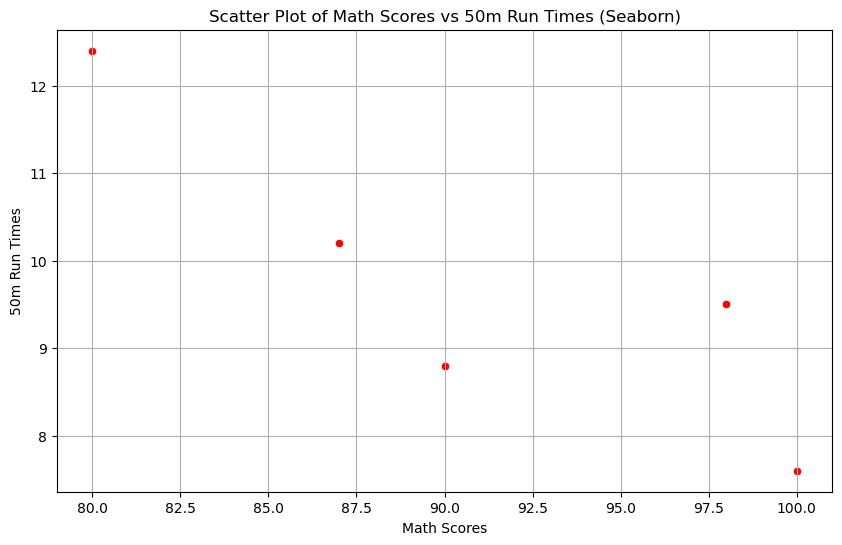

In [570]:
# Plot data with scattering plot
# Math vs. 50m run

plt.figure(figsize=(10, 6))
sns.scatterplot(data=suits_m, x='Math', y='50m run', color='red', marker='o')
plt.title('Scatter Plot of Math Scores vs 50m Run Times (Seaborn)')

plt.xlabel('Math Scores')
plt.ylabel('50m Run Times')
plt.grid(True)
plt.show()

プロット範囲を変えてみる。/ Change the ranges of axes.
<br>
* [Matplotlib で軸が等しい正方形のプロットを作成する方法](https://www.delftstack.com/ja/howto/matplotlib/how-to-make-a-square-plot-with-equal-axes-in-matplotlib/)
* [Axis Equal Demo](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/axis_equal_demo.html): How to set and adjust plots with equal axis ratios.
* [プロット範囲を変えてみる：xlim/ylim](https://doku-pro.com/matplotlib-xlim-ylim/)

<Figure size 1000x600 with 0 Axes>

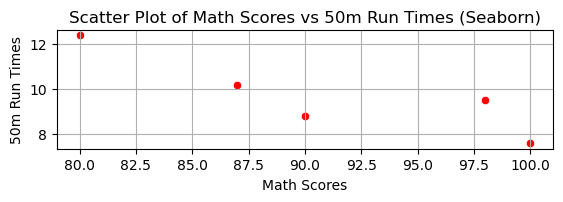

In [572]:
# 正方形でプロット
plt.figure(figsize=(10, 6))
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(data=suits_m, x='Math', y='50m run', color='red', marker='o')
plt.title('Scatter Plot of Math Scores vs 50m Run Times (Seaborn)')
ax.set_aspect("equal", adjustable="box")
plt.xlabel('Math Scores')
plt.ylabel('50m Run Times')
plt.grid(True)
plt.show()

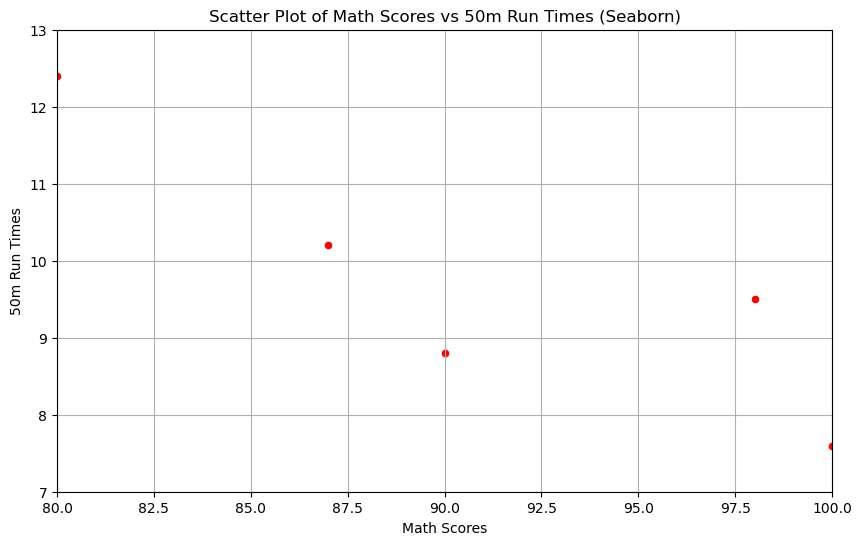

In [574]:
# プロット範囲を指定する。 / Specify the ranges of the axes.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=suits_m, x='Math', y='50m run', color='red', marker='o')
plt.title('Scatter Plot of Math Scores vs 50m Run Times (Seaborn)')

plt.xlabel('Math Scores')
plt.ylabel('50m Run Times')
plt.ylim([7,13])
plt.xlim([80,100])
plt.grid(True)
plt.show()

このように、単位の違う変数で評価をしようと思うと、うまく解析できないことがあります。<br>
なので、平均が０、標準偏差が１になるように、データの縮尺を変える処理を行います。<br>
この処理をデータの標準化と呼びます。<br>
今から、平均と分散の復習を簡単にしてから、標準化について学びます。<br>
<br>
As you can see from the figure above, if you have two variables of different scales, we often have difficulties to analyze data properly.<br>
We rescale the data so that the averages are 0 and the standard deviations are 1.<br>
This data processing procedure is called Standardization.<br>
Now, we are going to quickly review average and variation, then we will learn the process of Standardization.<br>

<a id="average"></a>

## 平均 / Average
平均値を求める式は以下のように書けます。/ Average is obtained by the equation below.<br>

\begin{eqnarray}
\overline{x}=\frac{1}{n}\sum^n_{i=1}x_i
\end{eqnarray}

In [576]:
# 数学の平均値 / The average of Math score
print('Average：', suits_m['Math'].mean())

Average： 91.0


In [577]:
# 50m走の平均値 / The average of time of 50m run
# Display the result
print('Average：', suits_m['50m run'].mean())

Average： 9.7


<a id="std"></a>

## 分散と標準偏差 / Variation and Standard deviation
データが正規分布に従っているという仮定の上で、データのばらつき具合を見るために、分散や標準偏差を用います。<br>
データがどのくらい平均付近に集まっているか、幅広く分布しているか、を測ることができます。<br>
分散の計算式は以下の通りです。分散は$\sigma^2$と示すことが一般的です。$\sigma$は標準偏差です。<br>
<br>
Based on the assumption that the variables are normally distributed, we evaluate the dispersion of data with variation.<br>
Variation tells us how much the data are dispersed widely or distribute in a very narrow range around the average.<br>
Standard deviation and variation are generally denoted as $\sigma$ and $\sigma^2$, respectively.<br>
Variation is obtained as follows. 

\begin{eqnarray}
\sigma^2 = \frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2
\end{eqnarray}
<br>
[参考サイト: Pythonで標準偏差・分散・平均値・中央値 等の統計量を取得する方法 – サンプルコードあり](https://it-engineer-lab.com/archives/1057)

### Pandas で分散を計算する / Calculate variation with Pandas.

In [ ]:
# 分散 / variation
suits_m['Math'].var()

# 結果を表示してください。/ Display the result
print('Variation：', suits_m['Math'].var())

Variation： 67.0


In [579]:
# 分散 / variation
# 50m走の分散を計算してください。Calculate the variation of the score of 50m runs.
suits_m['50m run'].var()

# 結果を表示してください。/ Display the result
print('Variation：', suits_m['50m run'].var())


Variation： 3.2


### Pandas で標準偏差を計算する / Calculate Standard deviation with Pandas.
標準偏差は分散の平方根で、以下のようになります。標準偏差は$\sigma$で示すことが一般的です。/ Standard deviation is a square root of variation.<br>

\begin{eqnarray}
\sigma = \sqrt{\frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2}
\end{eqnarray}

分散では、実際のデータのばらつきがどの程度かわかりません。なぜなら、上記で提示した分散の定義式を見るとわかるように、計算式で二乗しているためです。標準偏差にすれば、単位の次元が実際のデータと同じなので、以下の結果から±8日程度のばらつきがあることが分かります。<br>
標準偏差は`std()`で計算できます。<br>
<br>
The dimension of variaton is square of the original data. <br>
In order to see the dispersion of the data, the measure has to have the same dimension as the original data. <br>
Thus, standard deviation is appropriate to evaluate the dispersion of the data.<br>
Standard deviation is calculated with `std()` command.

In [ ]:
# 標準偏差 σ
print('Standard deviation：', suits_m['Math'].std())

Standard deviation： 8.18535277187245


In [580]:
# 標準偏差 σ
# Calculate the Standard deviation of the score of 50m runs.
suits_m['50m run'].std()

# 結果を表示してください。/ Display the result
print('Standard deviation：', suits_m['50m run'].std())


Standard deviation： 1.7888543819998317


<a id="standardization"></a>

### データの標準化 / Standardization

平均や分散が異なるデータをクラスタリングなどで解析すると、値の大きな変数が分析に大きく影響を与え、値の小さな変数の影響が小さくなってしまうことがあります。<br>
すべての変数の影響を等しい重みで考慮して解析するために、データの規格化を行います。<br>
標準化とはスケーリングの一種で、データの各値から変数列の平均を引き、標準偏差で割ります。<br>
<br>
Results by some analysis, such as clustering, is affected strongly by mainly the variables which have large mean and large variation.<br>
In order to analyze data properly, we standardize data as follows.<br>
<br>
\begin{eqnarray}
X = \frac{x - \mu}{\sigma}
\end{eqnarray}

$\mu$: 平均 / mean<br>
$\sigma$: 標準偏差 / standard deviation<br>
<br>
→つまり、すべての変数を平均０、標準偏差１の分布になるように、スケール変換する、ということです。<br>
→To analyze multiple data evenly, we normalize data so that each varialbles has mean to be 0 and variation to be 1.<br>
<br>
<img src="img/w4_Standardization.png" width=60%>

こうすることで変数間の単位が消え数値の大小と意味するところが合致します（値が0ならそれは平均値、1なら1標準偏差だけ平均値より大きい値とわかります）。<br>
説明変数の尺度を揃えることで、機械学習のアルゴリズムをよりうまく動作させられます。<br>
データの標準化は、上の式を用いて自分で計算することもできますが、`StandardScaler`クラスを使うこともできます。<br>
<br>
By carrying out the standardization, we can compare the values and the magnitudes between different variables.<br>
It help us to analyze the data with Machine learning algorithms.<br>
You can simply rescale the variables using the equation above.<br>
It is also helpful to use `StandardScaler` class in Scikit-learn library.<br>

[参考サイト:統計学における標準化](https://data-science.gr.jp/theory/tbs_standardization.html)<br>
[参考サイト:Scikit-Learnを用いた標準化](http://ailaby.com/scaler/)

先ほどのデータ(`suits_m['Math']` & `suits_m['50m run']`)を標準化してみましょう。<br>
標準化した結果を散布図で示してください。<br>
<br>
Let's standardize the data, `suits_m['Math']` & `suits_m['50m run']`.<br>
Please show the standardized data with a scattering plot.

<img src="img/w4_Normal_Distribution_PDF.png" width="300px">

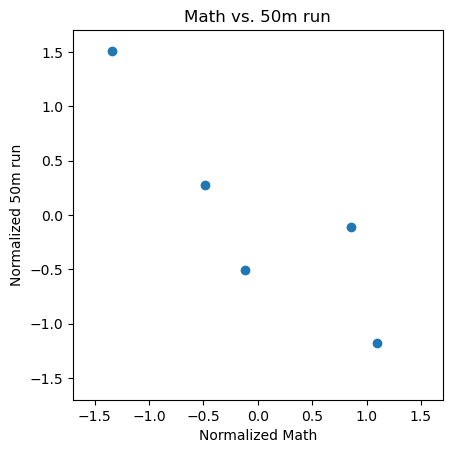

In [ ]:
# mean of "Math"
math_mu = suits_m['Math'].mean() 
# standard deviation of "Math"
math_std = suits_m['Math'].std() 

# mean of "50m run"
run_mu = suits_m['50m run'].mean() 
# standard deviation of "50m run"
run_std = suits_m['50m run'].std() 

plt.scatter((suits_m['Math']-math_mu)/math_std,(suits_m['50m run']-run_mu)/run_std)
plt.title('Math vs. 50m run')
plt.xlabel('Normalized Math')
plt.ylabel('Normalized 50m run')
plt.xlim(-1.7, 1.7)
plt.ylim(-1.7, 1.7)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Scikit-learnを用いた標準化
### Standardization with Scikit-learn

サンプルデータを用意します。<br>
Sample data set is prepared as follows.<br>

In [581]:
mu_x = 20 # mean of x
var_x = 5 # variation of x
mu_y = 35 # mean of y
var_y = 8 # variation of y
n = 100 # number of data points

# Data points are generated with a random generator function.
# 平均 mu_x, 分散 var_x の正規分布に従う乱数を生成する。
x = normal(size=n)*var_x + mu_x
# 平均 mu_y, 分散 var_y の正規分布に従う乱数を生成する。
y = normal(size=n)*var_y + mu_y
# 0 から 99 までの整数からなるリスト
z = np.arange(0, 100, 1)


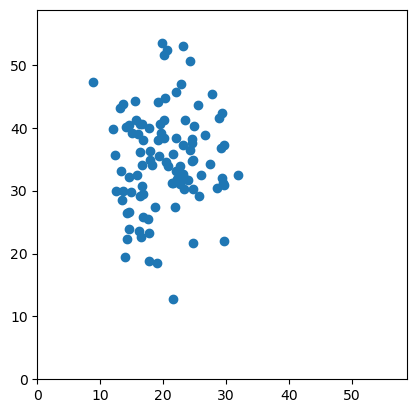

In [ ]:

# plt.figure()
# plt.hist(x, bins='auto',alpha=0.3, density=True, histtype='stepfilled',color='r')
# plt.hist(y, bins='auto',alpha=0.3, density=True, histtype='stepfilled',color='b')
# plt.axvline(x.mean(), color='r')
# plt.axvline(y.mean(), color='b')
# 正方形でプロット
plt.axis('square')
# プロット範囲を指定する。 / Specify the ranges of the axes.
# ｘの最大値とｙの最大値のうち、大きいほうをｘ軸とｙ軸の上限にして、正方形にプロット
# プロット点が枠上に来ないように、プロット範囲を上限値の1.1倍にして余白を作ってあります。
plt.xlim(0,max(max(x),max(y))*1.1)
plt.ylim(0,max(max(x),max(y))*1.1)
plt.scatter(x,y)

## hist のオプションについて、自分で調べてみよう
## Please look into the options of 'hist'.

In [ ]:
# bins

# alpha

# density

# histtype

# color



In [ ]:
# 標準化のためのクラスをインポート
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler

mu_x = 20
mu_y = 35
var_x = 5
var_y = 8
n = 1000

# 平均 mu_x, 分散 var_x の正規分布に従う乱数を生成する。
x = normal(size=n)*var_x + mu_x
# 平均 mu_y, 分散 var_y の正規分布に従う乱数を生成する。
y = normal(size=n)*var_y + mu_y

xx = np.vstack([x, y]) # x and y is horizontally stacked.
xx.shape
xx = xx.T # xx is transposed (because a data set has to be in column for the standardization).
xx.shape

sc = StandardScaler()
x_std = sc.fit_transform(xx)


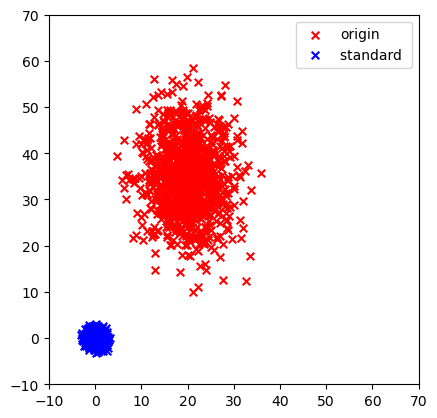

In [ ]:

plt.scatter(xx[:, 0], xx[:, 1], c='red', marker='x', s=30, label='origin')
plt.scatter(x_std[:, 0], x_std[:, 1], c='blue', marker='x', s=30, label='standard ')
plt.legend(loc='upper right')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-10, 70)
plt.ylim(-10, 70)
plt.show()

# StandardScaler は二次元配列でないと動かないようです。
# 1次元配列に適用しようとすると、エラーが出て動きません。。
# Please note that StandardScaler can be applied to two dimensional arrays.
# Somehow, it doesn't work with one dimensional array...

## 可視化 : 散布図
## Visualization : Scattering plot
マークの大きさを変えてみよう。/ Please change the size of the markers.<br>
軸のラベルのフォントサイズを変えてみよう。/ Please change the font size of the axis labels.<br>

[Supplement: Scattering plot](Ex_S_Matplotlib.ipynb#scatterplot)<br>

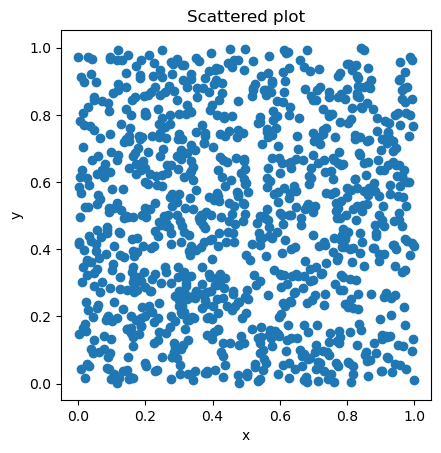

In [ ]:
#グラフを業内に表示
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import rand

n=1000
x = rand(n)
y = rand(n)

plt.scatter(x,y)
plt.title('Scattered plot')
plt.xlabel('x')
plt.ylabel('y')
# 正方形でプロット
plt.axis('square')
plt.show()

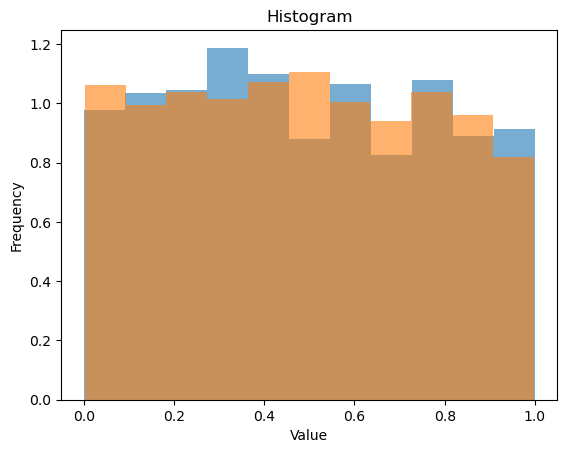

In [ ]:
plt.title('Histogram') # グラフのタイトル
plt.xlabel('Value') # x軸のラベル
plt.ylabel('Frequency') # y軸のラベル
plt.hist(x,bins='auto', density=True, alpha=0.6) # ビンの数を変えるにはbinsを変える。
plt.hist(y,bins='auto', density=True, alpha=0.6) # ビンの数を変えるにはbinsを変える。
plt.show()

**マークの大きさを変えてみよう。/ Please change the size of the markers.<br>
軸のラベルのフォントサイズを変えてみよう。/ Please change the font size of the axis labels.**

<a id="barchart"></a>

## 可視化 : 棒グラフ
## Visualization : Bar charts
マークの大きさを変えてみよう。/ Please change the size of the markers.<br>
軸のラベルのフォントサイズを変えてみよう。/ Please change the font size of the axis labels.<br>

[Supplement: Bar charts](Ex_S_Matplotlib.ipynb#barchart)<br>

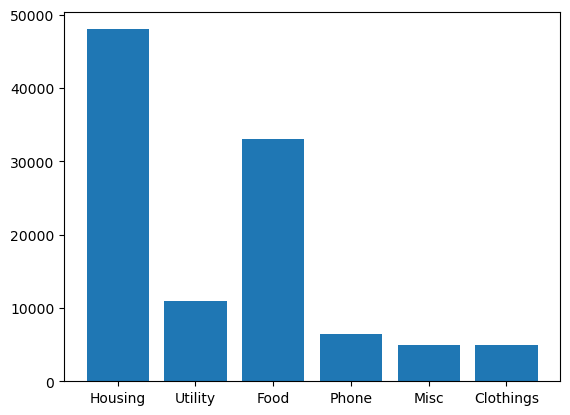

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array([48000, 11000, 33000, 6500, 5000,5000])
label = ["Housing", "Utility", "Food", "Phone", "Misc", "Clothings"]
plt.bar(label, x)
plt.show()

## 可視化 : ヒストグラム
## Visualization : Histogram


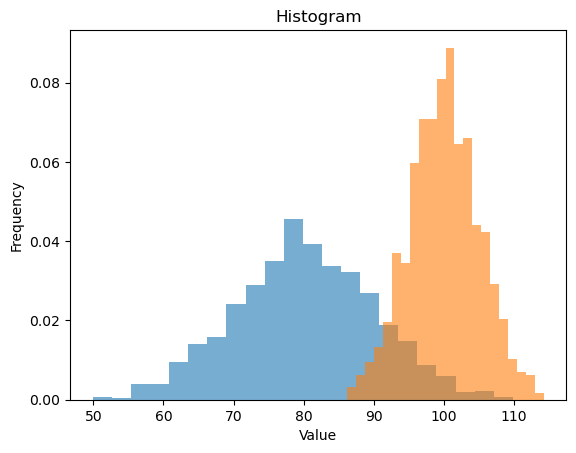

In [ ]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from numpy.random import normal,rand

mu_x = 80   # xの平均
mu_y = 100  # yの平均
var_x = 10  # xの標準偏差
var_y = 5  # yの標準偏差
n=1000 #生成する乱数の個数

x = normal(mu_x, var_x, n) # 平均 mu_x, 標準偏差 var_x の正規分布で乱数を n個 生成する。
y = normal(mu_y, var_y, n)
#plt.hist(x,bins=30) # ビンの数を変えるにはbinsを変える。
plt.title('Histogram') # グラフのタイトル
plt.xlabel('Value') # x軸のラベル
plt.ylabel('Frequency') # y軸のラベル
plt.hist(x,bins='auto', density=True, alpha=0.6) # ビンの数を変えるにはbinsを変える。
plt.hist(y,bins='auto', density=True, alpha=0.6) # ビンの数を変えるにはbinsを変える。
plt.show()


**それぞれのオプションの意味を調べてみましょう。**<br>
**Please check the option of the function, hist.**

<a id="heatmap"></a>

## 可視化 : ヒートマップ
## Visualization : Heat map

[参考サイト：Seaborn でヒートマップを作成する](https://pythondatascience.plavox.info/seaborn/heatmap)<br>


<Axes: >

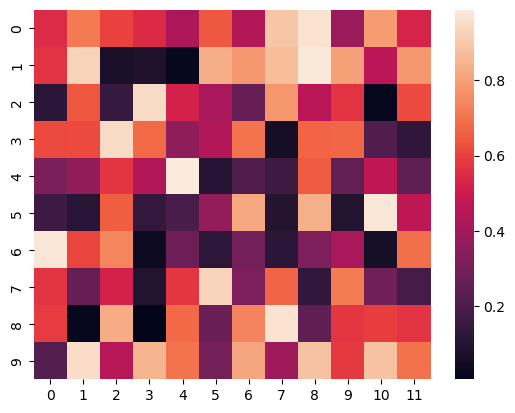

In [ ]:
import numpy as np 
import seaborn as sns
 
# 10x12 の一様乱数を生成
np.random.seed(0)
uniform_data = np.random.rand(10, 12)

# ヒートマップを出力
sns.heatmap(uniform_data)

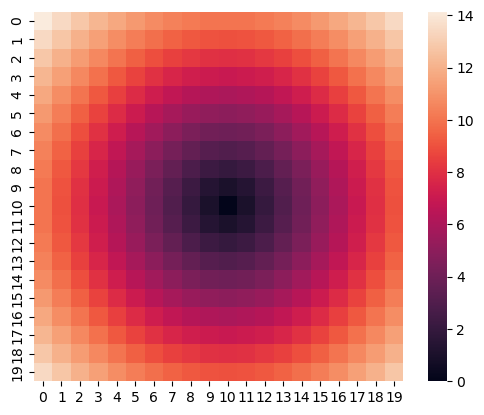

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import rand
import math


x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)
z = [[0 for i in range(len(x))] for j in range(len(y))]
for i in range(len(x)):
    for j in range(len(y)):
        z[i][j]= math.sqrt(x[i]*x[i] + y[j]*y[j])

sns.heatmap(z)
plt.gca().set_aspect('equal', adjustable='box')
#plt.scatter(x,z[:,10])
plt.show()
